In [2]:
%pylab inline
import ROOT
import root_numpy
import pandas as pd
import glob
import os.path

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
from pyAmsUtils import *

In [4]:
#filenames = sorted(glob.glob("/data/13*.root"), key=os.path.getmtime)[:-1]
filenames = sorted(glob.glob("/storage/gpfs_ams/ams/users/kostya/ntuples/*.root"), key=os.path.getmtime)[:-1]

def get_bits_names(f):
    tfile = ROOT.TFile(filenames[0]) 
    return str(tfile.Get("infos/selectionBits").GetString()).split(',')

selBits = get_bits_names(filenames[0])

def get_frame(f, branches=None):
    tfile = ROOT.TFile(f)
    tree  = tfile.Get("selections")
    return tree_to_frame(tree, branches=branches) 

In [4]:
def second_wise(filenames):
    frames = []
    progress= Progress(80, len(filenames))
    for i,f in enumerate(filenames):
        progress.step(i)
        data = get_frame(f)
        frames.append(data[~data['UTime'].duplicated()])
    return pd.concat(frames)

In [6]:
d = second_wise(filenames)
import gzip
with gzip.open("./saa.csv.gz",'w') as f:
    d.to_csv(f)

--------------------------------------------------------------------------------
-------------------------------------------------------------------------------

In [5]:
import gzip
with gzip.open("./saa.csv.gz",'r') as f:
    d = pd.DataFrame.from_csv(f)

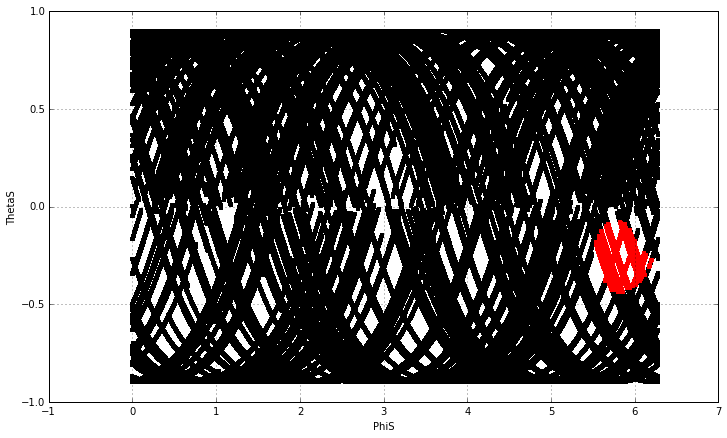

In [13]:
figsize(12,7)
saa = np.bitwise_and(d['selStatus'],2) == 0
d.plot(kind='scatter', x='PhiS', y='ThetaS', marker=',', lw=0, ax=gca(), c='k')
d[saa].plot(kind='scatter', x='PhiS', y='ThetaS', marker=',', lw=0, ax=gca(), c='r')

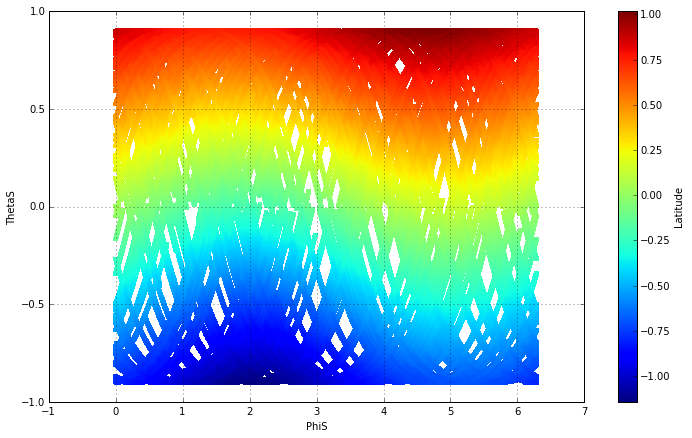

In [20]:
figsize(12,7)
d.plot(kind='scatter', x='PhiS', y='ThetaS', c='Latitude', marker=',', lw=0, ax=gca(), cmap='jet')


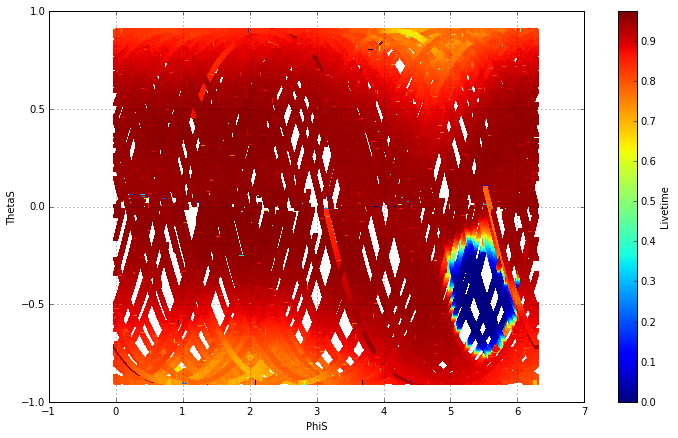

In [21]:
figsize(12,7)
d.plot(kind='scatter', x='PhiS', y='ThetaS', c='Livetime', marker=',', lw=0, ax=gca(), cmap='jet')
